# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer


In [ ]:
housing  = pd.read_csv("/content/drive/MyDrive/Datasets/housing.csv", header=0, sep=',')
# housing.head()
# housing.tail(8)
# housing[2:7]
# housing[:7]
# housing[-5:]
# housing.shape

# housing.info()
# housing.columns
# housing["ocean_proximity"].unique()
# housing["ocean_proximity"].value_counts()
# housing[housing['ocean_proximity'] == 'ISLAND']
# housing['population'][housing['ocean_proximity'] == 'ISLAND']
# housing.describe()
# housing.hist(bins=50, figsize=(12,7))
# plt.show()


train_set, test_set = train_test_split(housing, test_size=0.2, random_state=2)
# train_set.shape
# test_set.shape

train_set.head()
# test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND


# Plot population in the Colifornia map

<Axes: xlabel='longitude', ylabel='latitude'>

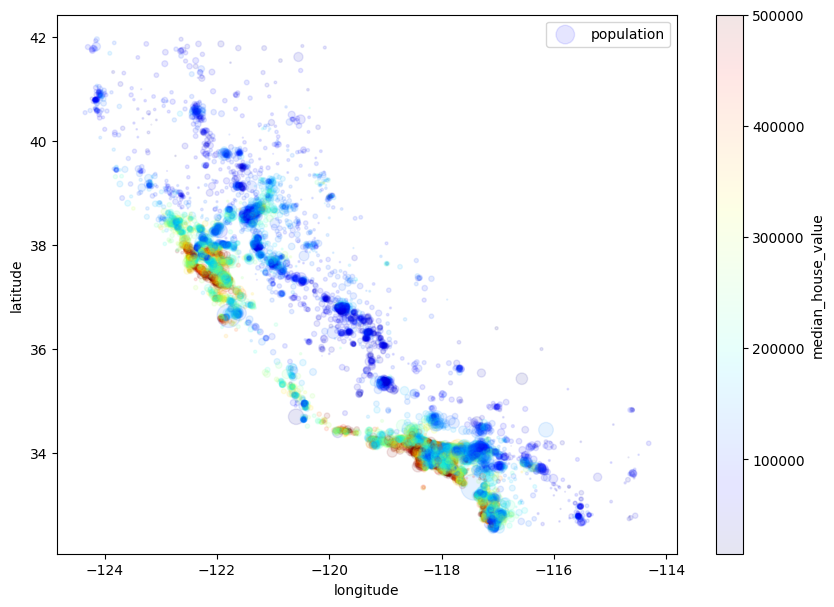

In [ ]:
data  = train_set.copy()
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1,
          s=data["population"]/100, label="population", figsize=(10,7),
          c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
          )

# Standard Correlation coefficient  [-1, 1]

In [ ]:
corr_matrix = housing.drop('ocean_proximity', axis=1).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population,-0.024650
longitude,-0.045967
latitude,-0.144160


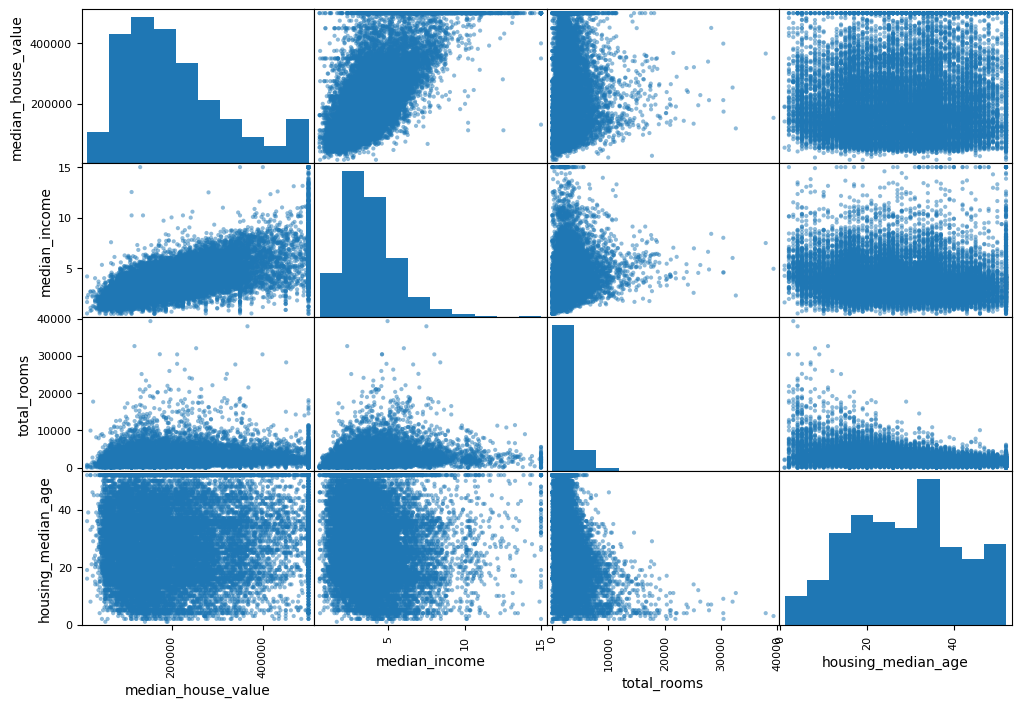

In [ ]:
features = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[features], figsize=(12,8))
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

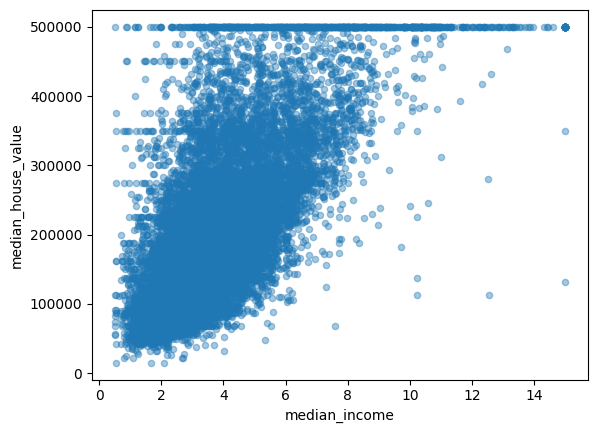

In [ ]:
data.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.4)

In [ ]:
data["total_rooms_per_household"] = data["total_rooms"]/data["households"]
data["total_bedrooms_per_room"] = data["total_bedrooms"]/data["total_rooms"]
data["population_per_household"] = data["population"]/data["households"]
data.sample(4)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_rooms_per_household,total_bedrooms_per_room,population_per_household
18229,-122.09,37.40,22.0,1489.0,436.0,662.0,470.0,3.5179,197200.0,NEAR BAY,3.168085,0.292814,1.408511
1381,-122.11,38.00,9.0,3424.0,583.0,1460.0,543.0,5.7600,212600.0,NEAR BAY,6.305709,0.170269,2.688766
14277,-117.13,32.70,35.0,1179.0,344.0,1372.0,330.0,1.9509,70200.0,NEAR OCEAN,3.572727,0.291773,4.157576
1853,-124.21,41.77,17.0,3461.0,722.0,1947.0,647.0,2.5795,68400.0,NEAR OCEAN,5.349304,0.208610,3.009274


In [ ]:
corr_matrix = data.drop('ocean_proximity', axis=1).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


,median_house_value
median_house_value,1.000000
median_income,0.689659
total_rooms_per_household,0.157994
total_rooms,0.133218
housing_median_age,0.108626
households,0.063245
total_bedrooms,0.047478
population,-0.027441
population_per_household,-0.027454
longitude,-0.046754


# Preproccesing Data


In [ ]:
df = train_set.copy()
df_label = df["median_house_value"].copy()
df = df.drop("median_house_value", axis=1)
# df.info()
df_num = df.drop("ocean_proximity", axis=1) # drop str value column
# df.info()

# Missing value
impute = SimpleImputer(missing_values=np.nan, strategy="median")
impute.fit(df_num)

X = impute.transform(df_num)
df_num_impute_tr = pd.DataFrame(X, columns=df_num.columns, index=df_num.index)
df_num_impute_tr.info()
df_num.info()
df_num_impute_tr.head()


<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 2072 to 2575
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB
<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 2072 to 2575
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_room

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817
10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133
2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536
4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284
16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815
